In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

# Example of an inverse probability problem

Like forward probability problems, inverse probability problems involve a
generative model of a process, but instead of computing the probability distri-
bution of some quantity produced by the process, we compute the conditional
probability of one or more of the unobserved variables in the process, given
the observed variables. This invariably requires the use of Bayes’ theorem.

There are eleven urns labelled by $u ∈ {0, 1, 2, . . . , 10},$ each containing ten balls. Urn $u$ contains $u$ black balls and $10 − u$ white balls. Fred selects an urn $u$ at random and draws $N$ times with replacement from that urn, obtaining $n_B$ blacks and $N − n_B$ whites. Fred’s friend, Bill, looks on. If after $N = 10$ draws $n_B = 3$ blacks have been drawn, what is the probability that the urn Fred is using is urn $u$, from Bill’s point of view? (Bill doesn’t know the value of $u$.)

## Análisis del problema

Quiero obtener la probabilidad correspondiente a cada urna (la distribución de probabilidad de las urnas) de extraer 3 esferas negras y 7 esferas blancas en 10 repeticiones del experimento básico de extraer una esfera con repetición:

$$ P\left(u \mid n_B, N\right) $$

## Resolución

La probabilidad compuesta de las variables aleatorias $u$ y $n$ puede escribirse como

\begin{align}
P\left( u,n_{B} \mid N \right) & = P\left(n_B \mid u,N \right)P \left(u\right).
\end{align}

Podemos entonces obtener la probabilidad condicional de $u$ dado $n_B$

\begin{align}
P\left(u \mid n_B, N\right) & = \frac{P\left( u,n_{B} \mid N \right)}{P\left( n_{B} \mid N \right)} \\
\\
& = \frac{P\left(n_B \mid u,N \right)P(u)}{P\left( n_{B} \mid N \right)}
\end{align}

La probabilidad marginal de $u$ es $P\left(u\right)=\frac{1}{11}$ para todo $u$.

La probabilidad de $n_B$ dados $u$ y $N$

\begin{align}
P\left( n_B \mid u,N\right) & = \binom{N}{n_B}f_u^{n_B}(1-f_u)^{N-n_B}
\end{align}

La probabilidad marginal de $n_B$

\begin{align}
P\left(n_B \mid N\right) & = \sum_{u}{P\left( u,n_{B} \mid N \right) = \sum_u{P\left(u\right)P\left( n_{B} \mid u,N \right)}}
\end{align}

Entonces
$$ P\left(u \mid n_B, N\right) = \frac{1}{P\left(n_B \mid N\right)}\frac{1}{11}\binom{N}{n_B}f_u^{n_B}(1-f_u)^{N-n_B} $$

$$ P(n_B=3 \mid N=10) $$

In [2]:
def nb_given_u(u):
    return 120 * ((u/10.0) ** 3) * (((10 - u)/10.0) ** 7)

u = np.arange(11)
marg_nb = np.sum(nb_given_u(u) * 1/11)
marg_nb

0.082726609090909092

In [3]:
def u_given_nb(u, marg_nb):
    return (1/(marg_nb*11)) * 120 * ((u/10.0) ** 3) * (((10 - u)/10.0) ** 7)

df = pd.DataFrame(u_given_nb(u, marg_nb), columns=['P(u|nb)'], index=range(11))
df

,P(u|nb)
0,0.000000
1,0.063073
2,0.221240
3,0.293220
4,0.236256
5,0.128779
6,0.046668
7,0.009892
8,0.000864
9,0.000010


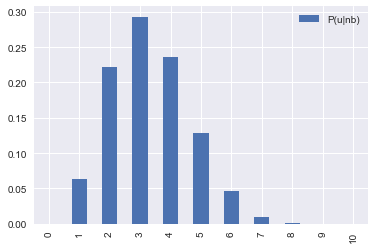

In [11]:
df.plot(kind='bar')